This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

***All the cells that start with "MM" written or edited by Moshe Mann.***

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

**MM:**<br>
The IMDB dataset is a set of 50,000 highly polarized reviews from the Internet Movie Database.

In [2]:
#train_data
#MM:
print('Train size:', len(train_data))
print('Test size:', len(test_data))
print('Each review sentence displayed as:', type(train_data[0]))
print('Each word convereted to:', type(train_data[0][0]))

Train size: 25000
Test size: 25000
Each review sentence displayed as: <class 'list'>
Each word convereted to: <class 'int'>


In [3]:
#train_labels[0]
#MM:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

**MM:**<br>
0 stands for negative and 1 stands for positive. 

In [4]:
#MM:
print('Maximum index:')
print(max([max(sequence) for sequence in train_data]))
import statistics
print('Average & stdv number of words at review:')
print(statistics.mean([len(sequence) for sequence in train_data]), statistics.stdev([len(sequence) for sequence in train_data]))
print('Min & Max number of words at review:')
print(min([len(sequence) for sequence in train_data]), max([len(sequence) for sequence in train_data]))

Maximum index:
9999
Average & stdv number of words at review:
238.71364 176.49720362789304
Min & Max number of words at review:
11 2494


**MM:**<br>
The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data.<br>
That's why no word index will exceed 10,000.

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [6]:
#MM:
print('and this is the text:')
decoded_review

and this is the text:


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
#MM:
print(len(x_train[0]))
x_train[0]

10000


array([0., 1., 1., ..., 0., 0., 0.])

**MM:**<br>
All the lists turned into 10,000-dimensional vector of 0s and 1s.<br>
If the index exists the value is 1, otherwise 0.

In [9]:
#MM:
#vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

##Below four sigmoids in last layers; in our model there's only one. Each sigmoid is like the "logistic regression" from ML

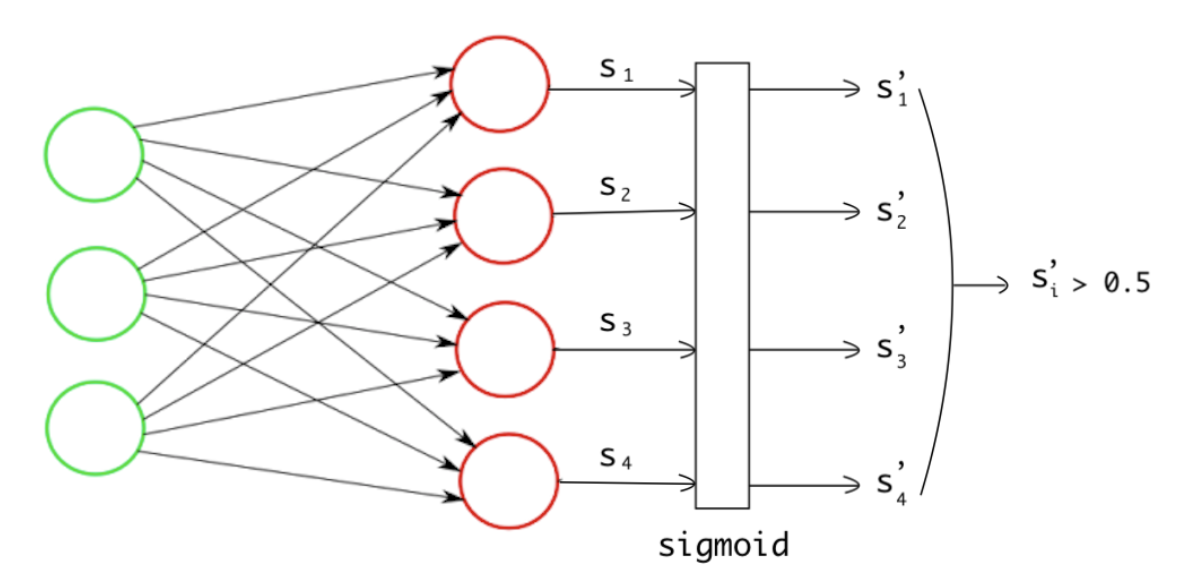

In [11]:
input_shape = x_train.shape  
model.build(input_shape) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (25000, 16)               160016    
                                                                 
 dense_1 (Dense)             (25000, 16)               272       
                                                                 
 dense_2 (Dense)             (25000, 1)                17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5314 - accuracy: 0.7775 - val_loss: 0.4026 - val_accuracy: 0.8718
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3189 - accuracy: 0.8997 - val_loss: 0.3147 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2337 - accuracy: 0.9258 - val_loss: 0.2792 - val_accuracy: 0.8928
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1841 - accuracy: 0.9428 - val_loss: 0.2776 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1515 - accuracy: 0.9515 - val_loss: 0.2765 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1234 - accuracy: 0.9621 - val_loss: 0.2904 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1033 - accuracy: 0.9691 - val_loss: 0.3011 - val_accuracy: 0.8853
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

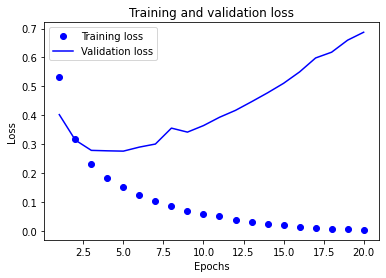

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

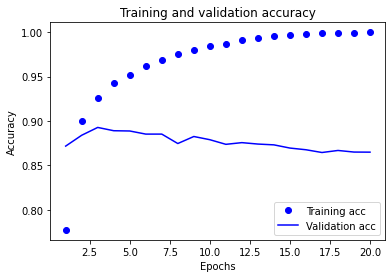

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**MM:**<br>
We can see here overfitting.<br>
to prevent overfitting, you could stop training after three epochs:

**Retraining a model from scratch**

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4417 - accuracy: 0.8287
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2577 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1987 - accuracy: 0.9300
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2984 - accuracy: 0.8819


In [19]:
results

[0.2983556091785431, 0.8819199800491333]

### Using a trained model to generate predictions on new data

In [20]:
model.predict(x_test)

array([[0.1555756 ],
       [0.99995846],
       [0.6393962 ],
       ...,
       [0.11987388],
       [0.05433291],
       [0.5701431 ]], dtype=float32)

### Further experiments
**MM:**<br>
Try using one or three hidden layers, and see how
doing so affects validation and test accuracy. <br>
Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.<br>
Try using the mse loss function instead of binary_crossentropy.<br>
Try using the tanh activation instead of relu.

In [24]:
#MM:
#Try one hidden layer with 32 hidden units:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# input_shape = x_train.shape  
# model.build(input_shape) 
# model.summary()

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4290 - accuracy: 0.8294
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2555 - accuracy: 0.9111
Epoch 3/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2012 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2985 - accuracy: 0.8810


In [25]:
#MM:
print('test_loss:', results[0])
print('test_acc:', results[1])

test_loss: 0.298507422208786
test_acc: 0.8809999823570251


**MM:**<br>
Accuracy decresed a little bit.

In [26]:
#MM:
#Try three hidden layer with 32 hidden units:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# input_shape = x_train.shape  
# model.build(input_shape) 
# model.summary()

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4410 - accuracy: 0.8059
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2424 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1900 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3234 - accuracy: 0.8785


In [27]:
#MM:
print('test_loss:', results[0])
print('test_acc:', results[1])

test_loss: 0.3233518898487091
test_acc: 0.8785200119018555


**MM:**<br>
Overfitting increased.

In [ ]:
#MM:
#Try two hidden layer with 64 hidden units:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# input_shape = x_train.shape  
# model.build(input_shape) 
# model.summary()

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
#MM:
print('test_loss:', results[0])
print('test_acc:', results[1])

### Wrapping up
**MM:**<br>
You usually need to do quite a bit of preprocessing on your raw data in order to
be able to feed it—as tensors—into a neural network. Sequences of words can
be encoded as binary vectors, but there are other encoding options, too.
<br>Stacks of Dense layers with relu activations can solve a wide range of problems
(including sentiment classification), and you’ll likely use them frequently.
<br>In a binary classification problem (two output classes), your network should
end with a Dense layer with one unit and a sigmoid activation: the output of
your network should be a scalar between 0 and 1, encoding a probability.
<br>With such a scalar sigmoid output on a binary classification problem, the loss
function you should use is binary_crossentropy.
<br>The rmsprop optimizer is generally a good enough choice, whatever your problem.
That’s one less thing for you to worry about.
<br>As they get better on their training data, neural networks eventually start overfitting
and end up obtaining increasingly worse results on data they’ve never
seen before. Be sure to always monitor performance on data that is outside of
the training set.